# Plot example "spatial signatures" of NA responses to artificial song segments

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import signal, stats
from sklearn import linear_model
import sys
import warnings; warnings.filterwarnings("ignore")

from aux import get_seg, rand_string
from disp import set_plot, plot_b, colors
from record_0_main import smlt_ma, smlt_lnma
from my_stats import nanpearsonr

cc = np.concatenate

FPS = 30.03  # sampling rate of behavioral data
DT = 1/FPS

In [2]:
np.random.seed(1)

N = 20

params_ma = {
    'TAU_R': np.random.uniform(120, 120, N),
    'TAU_A': np.random.uniform(.1, 2, N),
    'X_S': np.random.uniform(0, 1, N),
    'X_P': np.random.uniform(0, 1, N),
}

params_lnma_0 = {
    'TAU_R': np.random.uniform(20, 120, N),
    'TAU_A': np.random.uniform(.1, 2, N),
    # 'TAU_A': np.repeat(np.inf, N),
    'X_S': np.random.uniform(0, 1, N),
    'X_P': np.random.uniform(0, 1, N),
}

params_lnma_1 = {
    'TAU_R': np.random.uniform(20, 120, N),
    # 'TAU_A': np.random.uniform(.1, 2, N),
    'TAU_A': np.repeat(np.inf, N),
    'X_S': np.random.uniform(0, 1, N),
    'X_P': np.random.uniform(0, 1, N),
}

In [3]:
# motifs to keep track of
t_mtf = np.arange(0, 1, DT)

# sine motif
mtf_s = {
    'i_s': np.zeros(len(t_mtf)),
    'i_p': np.zeros(len(t_mtf)),
}
mtf_s['i_s'][10:20] = 1
mtf_s['b'] = np.zeros(len(t_mtf))
mtf_s['b'][mtf_s['i_s']==1] = 1
mtf_s['b'][mtf_s['i_p']==1] = 2

# low-freq pulse
mtf_p_0 = {
    'i_s': np.zeros(len(t_mtf)),
    'i_p': np.zeros(len(t_mtf)),
}
mtf_p_0['i_p'][10:20] = 1

mtf_p_0['b'] = np.zeros(len(t_mtf))
mtf_p_0['b'][mtf_p_0['i_s']==1] = 1
mtf_p_0['b'][mtf_p_0['i_p']==1] = 2

# hi-freq pulse
mtf_p_1 = {
    'i_s': np.zeros(len(t_mtf)),
    'i_p': np.zeros(len(t_mtf)),
}
# mtf_p_1['i_p'][:5] = 1
# mtf_p_1['i_p'][-5:] = 1
mtf_p_1['i_p'][2:4] = 1
mtf_p_1['i_p'][8:10] = 1
mtf_p_1['i_p'][14:16] = 1
mtf_p_1['i_p'][20:22] = 1
mtf_p_1['i_p'][26:28] = 1

mtf_p_1['b'] = np.zeros(len(t_mtf))
mtf_p_1['b'][mtf_p_1['i_s']==1] = 1
mtf_p_1['b'][mtf_p_1['i_p']==1] = 2

In [4]:
r_s = smlt_ma(mtf_s['i_s'], mtf_s['i_p'], params_ma, DT)[-1, :]
r_p_0 = smlt_ma(mtf_p_0['i_s'], mtf_p_0['i_p'], params_ma, DT)[-1, :]
r_p_1 = smlt_ma(mtf_p_1['i_s'], mtf_p_1['i_p'], params_ma, DT)[-1, :]

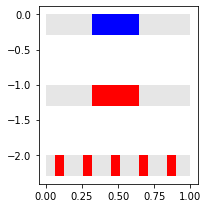

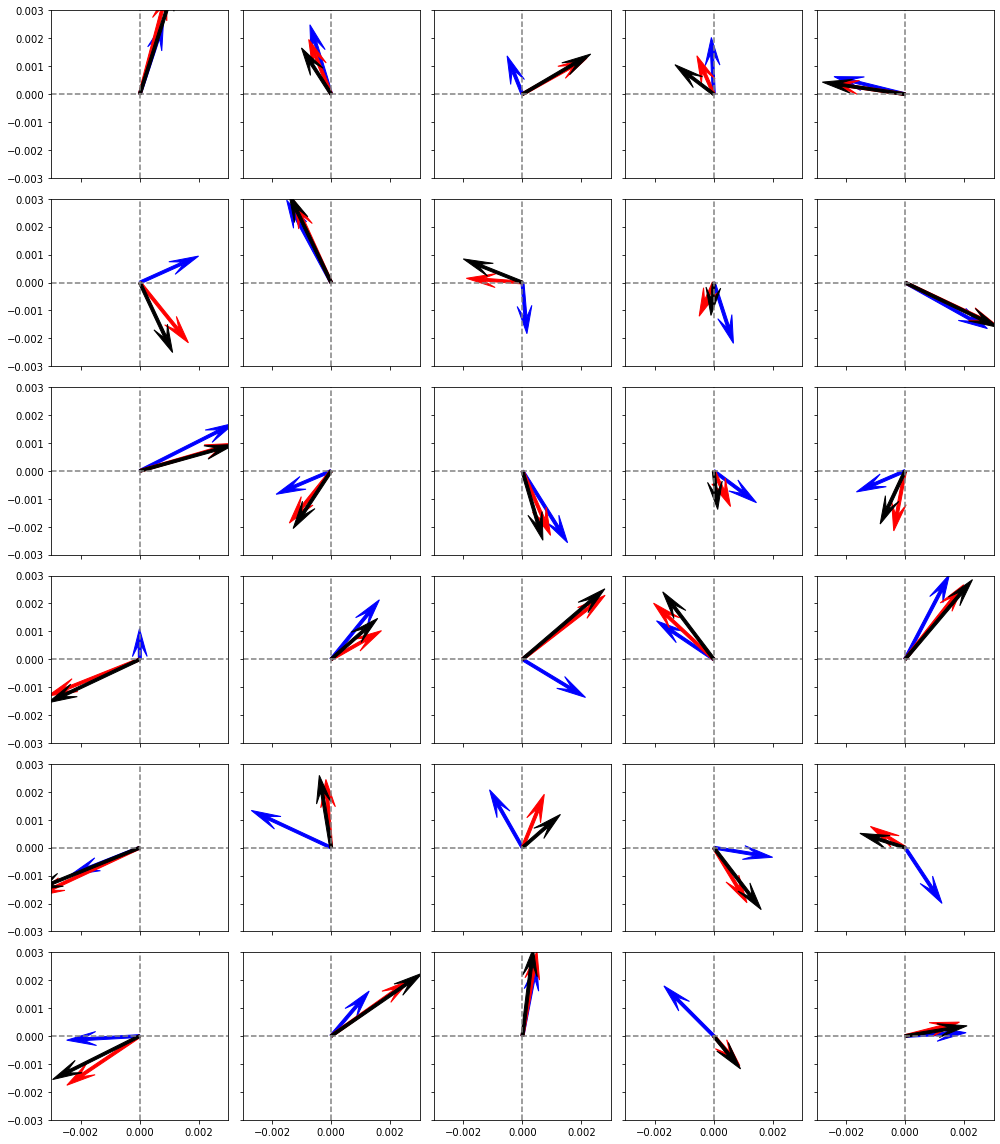

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), tight_layout=True)
for cmtf, mtf in enumerate([mtf_s, mtf_p_0, mtf_p_1]):
    plot_b(ax, t_mtf, mtf['b'], extent=[0, 1, -cmtf, -cmtf-.3], c=[(.9, .9, .9), 'b', 'r'])
    
fig.savefig('ms/5_lsh_bouts.svg')
    
fig, axs = plt.subplots(6, 5, figsize=(14, 16), tight_layout=True, sharex=True, sharey=True)
    
for cax, ax in enumerate(axs.flat, 1):
    # make random projection
    e_0 = np.random.randn(N)
    e_0 /= np.linalg.norm(e_0)
    
    e_1 = np.random.randn(N)
    e_1 /= np.linalg.norm(e_1)
    
    ax.arrow(0,0,r_s@e_0,r_s@e_1, width=0.0001, color='b', head_width=0.0005, head_length=0.001, overhang=.4)
    ax.arrow(0,0,r_p_0@e_0,r_p_0@e_1, width=0.0001, color='r', head_width=0.0005, head_length=0.001, overhang=.4)
    ax.arrow(0,0,r_p_1@e_0,r_p_1@e_1, width=0.0001, color='k', head_width=0.0005, head_length=0.001, overhang=.4)
    
    ax.axhline(0, c='gray', ls='--')
    ax.axvline(0, c='gray', ls='--')
    
    ax.set_xlim(-.003, .003)
    ax.set_ylim(-.003, .003)
    
fig.savefig('ms/5_lsh_random_projs.svg')